# Speaker Recognition using GMM

In [83]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd

def xml_to_df(dir):
    tree = ET.parse(dir)
    root = tree.getroot()
    mixture_data = []

    for distrib in root.findall('DistribGD'):
        weight = float(distrib.get('weight'))
        cst = float(distrib.get('cst'))
        det = float(distrib.get('det'))
        
        covInv = []
        for cov in distrib.findall('covInv'):
            covInv.append(float(cov.text))
        
        mean = []
        for m in distrib.findall('mean'):
            mean.append(float(m.text))
        
        mixture_data.append({
            'weight': weight,
            'cst': cst,
            'det': det,
            'covInv': np.array(covInv),
            'mean': np.array(mean)
        })
    return pd.DataFrame(mixture_data)


In [84]:
df_world = xml_to_df('world_model.xml')
df_000_dependent = xml_to_df('client000_text_dependent.xml')
df_000_independent = xml_to_df('client000_text_independent.xml')
df_012_dependent = xml_to_df('client012_text_dependent.xml')
df_012_independent = xml_to_df('client012_text_independent.xml')

In [86]:
df_world.sort_values(by='weight', ascending=False)


,weight,cst,det,covInv,mean
11,0.218076,2.209719e-06,0.034709,"[2.5120850976871902, 0.8604420115145925, 2.516...","[1.3660118155264833, -0.9312981301605985, -1.4..."
10,0.150894,7.106499e-06,0.003356,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.1250736118678443, 0.8431507846114418, 0.71..."
14,0.075170,3.160082e-05,0.000170,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.5157115545076614, 0.0350202380191308, 0.45..."
5,0.068906,5.205628e-06,0.006254,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.11185627706827264, 0.435270853365592, 0.36..."
12,0.061721,8.611602e-05,0.000023,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.7018801150113029, -0.027723698430319903, 0..."
7,0.059306,1.556675e-06,0.069940,"[2.5120850976871902, 2.008873629016238, 2.5168...","[0.06123491599912725, 0.6834547648834103, 0.53..."
2,0.051698,1.915952e-05,0.000462,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.4582912834881938, 0.18405150878158516, 0.4..."
3,0.050258,1.001162e-04,0.000017,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.7635639652460721, -0.08697838747500244, 0...."
6,0.048317,9.000577e-05,0.000021,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.8028004540445559, -0.42380114809802644, 0...."
4,0.047873,9.931340e-05,0.000017,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.7628327133288662, -0.0814690557030139, 0.3..."


In [87]:
df_000_independent.sort_values(by='weight', ascending=False)

,weight,cst,det,covInv,mean
11,0.218076,2.209719e-06,0.034709,"[2.5120850976871902, 0.8604420115145925, 2.516...","[1.9152136576900285, -1.7705604914537527, -1.9..."
10,0.150894,7.106499e-06,0.003356,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.2691514804536099, 0.7627160102276149, 0.68..."
14,0.075170,3.160082e-05,0.000170,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.34305106401980706, 0.4861140161036461, 0.5..."
5,0.068906,5.205628e-06,0.006254,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.37712150713950315, 0.30699371893599997, 0...."
12,0.061721,8.611602e-05,0.000023,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.527243256627906, 0.15881805254669262, 0.46..."
7,0.059306,1.556675e-06,0.069940,"[2.5120850976871902, 2.008873629016238, 2.5168...","[-0.05395561987174539, 0.7171692591673131, 0.6..."
2,0.051698,1.915952e-05,0.000462,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.2822109381238612, 0.589165362485576, 0.642..."
3,0.050258,1.001162e-04,0.000017,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.7726239134625845, 0.07512452251251986, 0.4..."
6,0.048317,9.000577e-05,0.000021,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.1324804562900363, -0.037786516182168654, -..."
4,0.047873,9.931340e-05,0.000017,"[2.5120850976871902, 2.093603520030366, 2.5168...","[-0.7841754858669576, 0.05488287099309455, 0.3..."


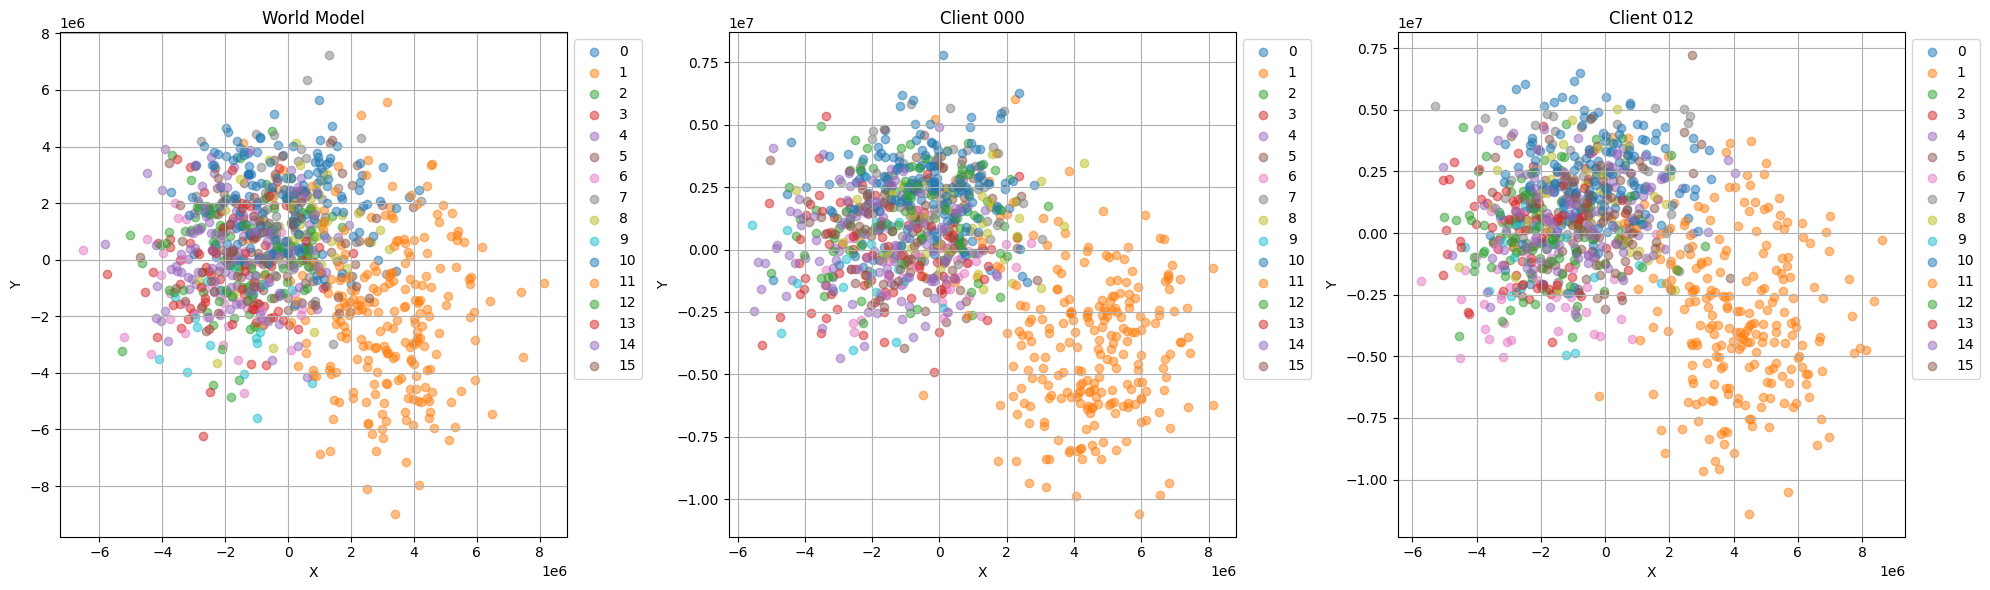

KL Divergence between corresponding components:
[0.011197346163825995, 2.5095388792793183, 0.807775335718657, 0.810562479518437, 1.1231362333764277, 1.4541057093090108, 1.1751660197570215, 0.44079643034317517, 0.4499417341924168, 0.23623948419535412, 0.8649021987830963, 2.3967297897404434, 1.4850084772862682, 0.16486949702584885, 0.5233843934830118, 0.7590595282993975]
[0.0011399767770027157, 3.7614597925116504, 1.7532587800308987, 0.41698896775352035, 3.023222453363912, 1.0909655487669379, 0.7949144707196522, 1.7381251628557823, 0.6681195569842231, 0.23556247236058084, 1.3205367308219973, 1.5323571247151162, 0.8931789368287042, 0.2941529845868976, 0.6428877047837738, 1.2910676627326458]


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to extract GMM parameters from DataFrame
def extract_gmm_params(df):
    weights = df['weight'].values
    means = np.vstack(df['mean'])
    cov_invs = np.array([np.diag(entry) for entry in df['covInv']])
    dets = df['det'].values
    csts = df['cst'].values
    return weights, means, cov_invs, dets, csts

# Function to generate and scale data points from GMM parameters
def generate_scaled_data_points(weights, means, cov_invs, dets, csts, num_points=1000):
    data_points = []
    for weight, mean, cov_inv in zip(weights, means, cov_invs):
        cov = np.linalg.inv(cov_inv)  # Calculate covariance matrix
        distribution = multivariate_normal(mean=mean, cov=cov)
        num_samples = int(num_points * weight)
        samples = distribution.rvs(size=num_samples)
        data_points.append(samples)
    
    # Scale the data points by determinant and constant
    scaled_data_points = []
    for points, det, cst in zip(data_points, dets, csts):
        scaled_points = points / (np.sqrt(det) * cst)
        scaled_data_points.append(scaled_points)
    
    return scaled_data_points

# Extract GMM parameters from world model and client model
world_weights, world_means, world_cov_invs, world_dets, world_csts = extract_gmm_params(df_world)
client_1_weights, client_1_means, client_1_cov_invs, client_1_dets, client_1_csts = extract_gmm_params(df_000_dependent)
client_2_weights, client_2_means, client_2_cov_invs, client_2_dets, client_2_csts = extract_gmm_params(df_012_dependent)

# Generate and scale data points
world_scaled_data_points = generate_scaled_data_points(world_weights, world_means, world_cov_invs, world_dets, world_csts)
client_1_scaled_data_points = generate_scaled_data_points(client_1_weights, client_1_means, client_1_cov_invs, client_1_dets, client_1_csts)
client_2_scaled_data_points = generate_scaled_data_points(client_2_weights, client_2_means, client_2_cov_invs, client_2_dets, client_2_csts)

# Labels for the components
component_labels = [f'{i}' for i in range(len(world_scaled_data_points))]

# Plot the scaled data points
plt.figure(figsize=(20, 6))

# Plot world model
plt.subplot(1, 3, 1)
for i, points in enumerate(world_scaled_data_points):
    plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label=component_labels[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('World Model')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

# Plot client 000 model
plt.subplot(1, 3, 2)
for i, points in enumerate(client_1_scaled_data_points):
    plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label=component_labels[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Client 000')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

# Plot client 012 model
plt.subplot(1, 3, 3)
for i, points in enumerate(client_2_scaled_data_points):
    plt.scatter(points[:, 0], points[:, 1], alpha=0.5, label=component_labels[i])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Client 012')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# Additional quantitative comparison (e.g., KL divergence)
def kl_divergence(mean1, cov1, mean2, cov2):
    cov1_inv = np.linalg.inv(cov1)
    cov2_inv = np.linalg.inv(cov2)
    kl = 0.5 * (np.log(np.linalg.det(cov2) / np.linalg.det(cov1))
                - mean1.shape[0]
                + np.trace(np.dot(cov2_inv, cov1))
                + np.dot(np.dot((mean2 - mean1).T, cov2_inv), (mean2 - mean1)))
    return kl

# Compute KL divergence between corresponding components
kl_divs_1 = []
kl_divs_2 = []
for i in range(len(world_means)):
    world_cov = np.linalg.inv(world_cov_invs[i])
    client_1_cov = np.linalg.inv(client_1_cov_invs[i])
    client_2_cov = np.linalg.inv(client_2_cov_invs[i])
    kl_div_1 = kl_divergence(world_means[i], world_cov, client_1_means[i], client_1_cov)
    kl_div_2 = kl_divergence(world_means[i], world_cov, client_2_means[i], client_2_cov)
    kl_divs_1.append(kl_div_1)
    kl_divs_2.append(kl_div_2)

print("KL Divergence between corresponding components:")
print(kl_divs_1)
print(kl_divs_2)
